# Part I: Data Preparation

## Read data from csv

In [1]:
import pandas as pd

DATA_DIR = 'Data'
CSV_FILE = DATA_DIR + '/' + 'KaggleV2-May-2016.csv'

# read data using read_csv function
#read_csv returns a dataframe
RawCsvDf = pd.read_csv(CSV_FILE)
#check out the data
print(RawCsvDf.head())
print(RawCsvDf.columns)
RawCsvDf.describe()


      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Data cleanup

- Cleanup column names
- Remove records with erroneous entries (e.g., negative ages). Look at what people have done in Kaggle

In [5]:
#import numpy
import numpy as np

#describe shows a negative age
#assume bad data and remove record
for theAge in RawCsvDf['Age']:
    if(theAge < 0):
        print(theAge)
#drop rows where Age = -1
CleanerDf = RawCsvDf[RawCsvDf.Age != -1]
for theAge in CleanerDf['Age']:
    if(theAge < 0):
        print(theAge)
#add column of 0 for missed appointment and 1 for made appt
#this is for the data exploration step
CleanerDf['NoShowBoolean'] = np.zeros(len(CleanerDf['No-show']))
CleanerDf['DayOfWeekIndex'] = np.zeros(len(CleanerDf['AppointmentDay']))
#make any missed appointments in No-show into 1s in NoShowBoolean
CleanerDf.loc[CleanerDf['No-show'] == 'Yes', 'NoShowBoolean'] = 1
CleanerDf['DayOfWeekIndex'] = CleanerDf['AppointmentDay'].apply(lambda x: pd.to_datetime(x).weekday())
#get day of week for the DayOfWeekIndex
#for index,row in CleanerDf.iterrows():
    #row = row.copy()
    #strDate = row.AppointmentDay
    #timestampDate = pd.to_datetime(strDate)
    #CleanerDf.loc[index,'DayOfWeekIndex'] = timestampDate.weekday()
    #print(timestampDate.weekday())

#to show that there is one fewer rows and no Age = -1
print(CleanerDf['No-show'].describe())
print(CleanerDf['NoShowBoolean'].value_counts())
#show day of week counts too
print(CleanerDf['DayOfWeekIndex'].value_counts())

-1


C:\Users\madag\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\madag\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\madag\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

count     110526
unique         2
top           No
freq       88207
Name: No-show, dtype: object
0.0    88207
1.0    22319
Name: NoShowBoolean, dtype: int64
2    25867
1    25640
0    22714
4    19019
3    17247
5       39
Name: DayOfWeekIndex, dtype: int64


C:\Users\madag\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Test set creation

- Create a test set of 20k records
- Use stratified sampling on the `No-Show` variable to make sure class proportions are the same for train and test sets
- Save train and test sets as csv files in the `processed_data` directory

In [6]:
#import sklearn
from sklearn.model_selection import StratifiedShuffleSplit

#specify where to save the data
PROCESSED_DATA_DIR = 'ProcessedData'

#find out the percentages of yes &  no for column No-show
NoShow = CleanerDf['No-show'].describe()
print(NoShow)
NoShowTotal = len(CleanerDf['No-show'])
NoShowNoCount = NoShow.freq
#Since there are only 2 values in this column
NoShowNoRatio = NoShowNoCount/NoShowTotal
NoShowYesRatio = 1 - NoShowNoRatio
print('Full Data set - ' + 'Made Appointment: ' + str(NoShowNoRatio) + ' | Missed Appointment: ' + str(NoShowYesRatio))

#do stratified sampling
#see: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html
split = StratifiedShuffleSplit(n_splits=1, test_size=20000, random_state=1234)
for train_index, test_index in split.split(CleanerDf, CleanerDf["No-show"]):
    train_set = CleanerDf.loc[train_index]
    test_set = CleanerDf.loc[test_index]
#compare test and training data sets to see that ratios of no-shows approximately match
print('Traning Data')
print(train_set["No-show"].value_counts() / len(train_set))
print('Test Data')
print(test_set["No-show"].value_counts() / len(test_set))

#save data sets as csv's
train_set.to_csv(PROCESSED_DATA_DIR + '/training.csv')
test_set.to_csv(PROCESSED_DATA_DIR + '/test.csv')

count     110526
unique         2
top           No
freq       88207
Name: No-show, dtype: object
Full Data set - Made Appointment: 0.798065613521 | Missed Appointment: 0.201934386479
Traning Data
No     0.798003
Yes    0.201986
Name: No-show, dtype: float64
Test Data
No     0.7983
Yes    0.2017
Name: No-show, dtype: float64


## Exploratory Data Analysis

Plot the `No-show` variable against other variables. Remember from this point forward you are only using the training set created in the previous step

In [10]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#look at a histgram
#%matplotlib inline
#import matplotlib.pyplot as plt
#train_set.hist(bins=30, figsize=(20,15))
#plt.show()

#split the df into made appointments and missed appointments
#df[df['Sales'] >= s]
MissedDf = train_set[train_set['NoShowBoolean'] == 1]
MadeDf = train_set[train_set['NoShowBoolean'] == 0]

#look at a histgram
%matplotlib inline
import matplotlib.pyplot as plt
#MissedDf.hist(bins=30, figsize=(20,15))
#plt.show()
#see correlation table
corr_matrix = train_set.corr()
corr_matrix["NoShowBoolean"].sort_values(ascending=False)


NoShowBoolean     1.000000
SMS_received      0.126032
Scholarship       0.030328
DayOfWeekIndex   -0.000846
Alcoholism       -0.001135
PatientId        -0.001364
Handcap          -0.004377
Diabetes         -0.016083
Hipertension     -0.037391
Age              -0.061817
AppointmentID    -0.163071
Name: NoShowBoolean, dtype: float64

This first look makes it seem that SMS_received,Scholarship are positively correlated with NoShowBoolean.  Age,DayOfWeekIndex, and some illnesses seem to be negatively correlated.

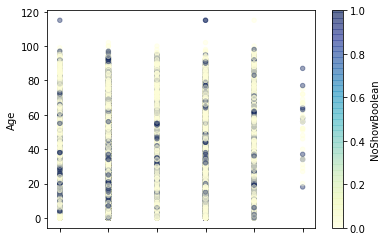

In [16]:
from pandas.plotting import scatter_matrix

#attributes = ["NoShowBoolean","SMS_received", "Scholarship", "Age", "DayOfWeekIndex"]
#scatter_matrix(train_set[attributes], figsize=(12, 8))
#plt.show()

train_set.plot(kind="scatter", x="DayOfWeekIndex", y="Age", alpha=0.4,
            c="NoShowBoolean", cmap=plt.get_cmap("YlGnBu"), colorbar=True)

A quick look at the day of week vs age seems to show younger patients are frequently no shows early in the week

## Data preprocessing

Create a scikit pipeline for preprocessing the data to prepare it for ML algorithms. At a minimum your pipeline should:

- Standardize numerical variables
- Transform categorical variables into numeric variables

Optionally, you can perform any other transformation you think is suitable. Again, refer to the intro notebook for an example of setting up a preprocessing pipeline.

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn import preprocessing

#I've already taken care of day of the week and make or miss appt.  I'll put neighborhood into numeric values here
train_set.columns
le = preprocessing.LabelEncoder()
#le.fit(train_set['Neighbourhood'])
#list(le.classes_)
# show the first 5 rows of the transformed training set

In [24]:
train_set['Neighbourhood'].describe()

count              90525
unique                81
top       JARDIM CAMBURI
freq                6322
Name: Neighbourhood, dtype: object

Not much of a pipeline...
